In [169]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [170]:
# Definitions
NUM_LENGTH_UNITS = 25
TIME_LIMIT = 50

# Diffusion equation parameters
D = 0.015
dt = 0.05
dx = 0.08

In [171]:
def decent_chance(x):
    return (x > 0.1)

def at_boundary(x):
    return (x == 0 or x == (NUM_LENGTH_UNITS - 1))

In [172]:
# Generate probability matrix
pos = np.linspace(-1, 1, NUM_LENGTH_UNITS)
time = np.arange(0, TIME_LIMIT, 0.05)

# Initialize P
shape = (len(time) + 1, NUM_LENGTH_UNITS)
P = np.zeros(shape)

# Since the particle starts at origin at time t=0, probability=1
origin = int(NUM_LENGTH_UNITS/2)
P[0][origin] = 1

# Loop to generate probability matrix
for t in range(len(time)):
    for x in range(len(pos)):
        
        # Boundary condition
        if at_boundary(x):
            P[t+1][x] = 0
            continue
            
        # Diffusion equation
        P[t+1, x] = P[t, x] + D*dt/(dx**2)*(P[t, x+1] - 2*P[t, x] + P[t, x-1])
        
# Display probability matrix
P

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0014675 , 0.00290988, ..., 0.00290988, 0.0014675 ,
        0.        ],
       [0.        , 0.00146455, 0.00290405, ..., 0.00290405, 0.00146455,
        0.        ],
       [0.        , 0.00146162, 0.00289823, ..., 0.00289823, 0.00146162,
        0.        ]])

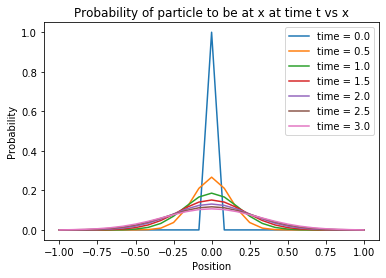

In [173]:
# Graph: Probability of particle to be at x at time t vs x
legend = []

# Generate plots
step = 10
for t in range(0, len(P) - step, step):
    
    # Ignore graphs which are too spread to prevent crowding
    if not decent_chance(P[t][mid]):
        continue
        
    # Plot graph
    plt.plot(pos, P[t])
    legend.append(f"time = {time[t]}")

# Graph attributes
plt.title("Probability of particle to be at x at time t vs x")
plt.legend(legend)
plt.xlabel("Position")
plt.ylabel("Probability")
plt.show()